In [2]:
rm( list=ls() )  #Borro todos los objetos
gc()   #Garbage Collection

#cargo las librerias que necesito
require("data.table")
require("rpart")
require("rpart.plot")

#Aqui debe cambiar los parametros por los que desea probar

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,640357,34.2,2206072,117.9,2206072,117.9
Vcells,1277634,9.8,106145265,809.9,119544127,912.1


In [11]:
# 15.8

param_basicos  <- list( "cp"=          -0.9,  #complejidad minima
                        "minsplit"=   1000,     #minima cantidad de registros en un nodo para hacer el split
                        "minbucket"=  300,     #minima cantidad de registros en una hoja
                        "maxdepth"=     7 )    #profundidad máxima del arbol

In [13]:
# 17.3

param_basicos  <- list( "cp"=          -0.9,  #complejidad minima
                        "minsplit"=   1801,     #minima cantidad de registros en un nodo para hacer el split
                        "minbucket"=  330,     #minima cantidad de registros en una hoja
                        "maxdepth"=     6.5 )    #profundidad máxima del arbol

In [15]:
# 17.26

param_basicos  <- list( "cp"=          -0.9,  #complejidad minima
                        "minsplit"=   1850,     #minima cantidad de registros en un nodo para hacer el split
                        "minbucket"=  333,     #minima cantidad de registros en una hoja
                        "maxdepth"=     6.5 )    #profundidad máxima del arbol

In [18]:
# 17.25

param_basicos  <- list( "cp"=          -0.8,  #complejidad minima
                        "minsplit"=   1853,     #minima cantidad de registros en un nodo para hacer el split
                        "minbucket"=  323,     #minima cantidad de registros en una hoja
                        "maxdepth"=     6.3 )    #profundidad máxima del arbol

In [20]:
# 16.94

param_basicos  <- list( "cp"=          -0.80,  #complejidad minima
                        "minsplit"=   1823,     #minima cantidad de registros en un nodo para hacer el split
                        "minbucket"=  323,     #minima cantidad de registros en una hoja
                        "maxdepth"=     6.5 )    #profundidad máxima del arbol

In [28]:
# 16.95

param_basicos  <- list( "cp"=          -1,  #complejidad minima
                        "minsplit"=   1823,     #minima cantidad de registros en un nodo para hacer el split
                        "minbucket"=  290,     #minima cantidad de registros en una hoja
                        "maxdepth"=     7.5 )    #profundidad máxima del arbol

In [32]:
# 16.94

param_basicos  <- list( "cp"=          -1,  #complejidad minima
                        "minsplit"=   1823,     #minima cantidad de registros en un nodo para hacer el split
                        "minbucket"=  390,     #minima cantidad de registros en una hoja
                        "maxdepth"=     6.5 )    #profundidad máxima del arbol

Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"

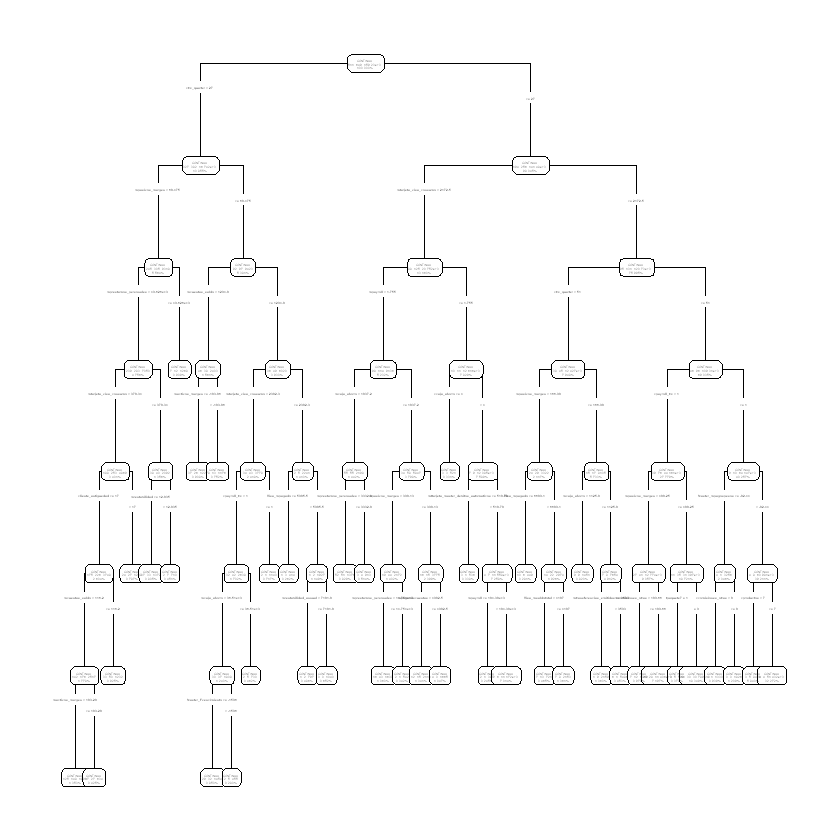

In [33]:
#Aqui se debe poner la carpeta de SU computadora local
# setwd("D:\\gdrive\\ITBA2022A\\")  #Establezco el Working Directory
setwd("C:\\Users\\tomya\\Desktop\\Mineria de Datos")

#cargo los datos de 202011 que es donde voy a ENTRENAR el modelo
dtrain  <- fread("./datasets/paquete_premium_202011.csv")

#genero el modelo,  aqui se construye el arbol
modelo  <- rpart("clase_ternaria ~ .",  #quiero predecir clase_ternaria a partir de el resto de las variables
                 data = dtrain,
                 xval=0,
                 control=  param_basicos )

#grafico el arbol
prp(modelo, extra=101, digits=5, branch=1, type=4, varlen=0, faclen=0)


#Ahora aplico al modelo  a los datos de 202101  y genero la salida para kaggle

#cargo los datos de 202011, que es donde voy a APLICAR el modelo
dapply  <- fread("./datasets/paquete_premium_202101.csv")

#aplico el modelo a los datos nuevos
prediccion  <- predict( modelo, dapply , type = "prob")

#prediccion es una matriz con TRES columnas, llamadas "BAJA+1", "BAJA+2"  y "CONTINUA"
#cada columna es el vector de probabilidades 

#agrego a dapply una columna nueva que es la probabilidad de BAJA+2
dapply[ , prob_baja2 := prediccion[, "BAJA+2"] ]

#solo le envio estimulo a los registros con probabilidad de BAJA+2 mayor  a  1/60
dapply[ , Predicted  := as.numeric(prob_baja2 > 1/60) ]

#genero un dataset con las dos columnas que me interesan
entrega  <- dapply[   , list(numero_de_cliente, Predicted) ] #genero la salida

#genero el archivo para Kaggle
#creo la carpeta donde va el experimento
dir.create( "./labo/exp/", showWarnings = FALSE  )
dir.create( "./labo/exp/KA2022/", showWarnings = FALSE  )

fwrite( entrega, 
        file= "./labo/exp/KA2022/K242_001.csv", 
        sep= "," )